# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Your code here
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.describe()
df = df.sample(n = 60000)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 730124 to 1687712
Data columns (total 11 columns):
step              60000 non-null int64
type              60000 non-null object
amount            60000 non-null float64
nameOrig          60000 non-null object
oldbalanceOrg     60000 non-null float64
newbalanceOrig    60000 non-null float64
nameDest          60000 non-null object
oldbalanceDest    60000 non-null float64
newbalanceDest    60000 non-null float64
isFraud           60000 non-null int64
isFlaggedFraud    60000 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 5.5+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b5c3250>,
      dtype=object)

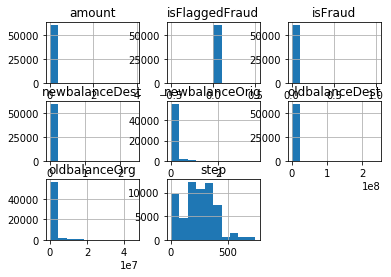

In [10]:
df.hist()

### What is the distribution of the outcome? 

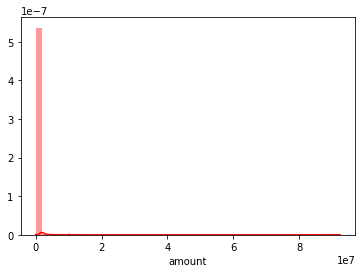

In [6]:
# Your response here
sns.distplot(df['amount'], color='r')

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [8]:
# Your code here
null_cols = df.isnull().sum()
null_cols[null_cols > 0]

Series([], dtype: int64)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 730124 to 1687712
Data columns (total 11 columns):
step              60000 non-null int64
type              60000 non-null object
amount            60000 non-null float64
nameOrig          60000 non-null object
oldbalanceOrg     60000 non-null float64
newbalanceOrig    60000 non-null float64
nameDest          60000 non-null object
oldbalanceDest    60000 non-null float64
newbalanceDest    60000 non-null float64
isFraud           60000 non-null int64
isFlaggedFraud    60000 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 5.5+ MB


In [13]:
df.isFraud.value_counts()

0    59920
1       80
Name: isFraud, dtype: int64

In [16]:
df.nameDest.value_counts()

C1973999005    4
C873744905     4
C640654428     4
C1171466445    4
C875629235     4
              ..
M509859835     1
C1453963040    1
C1997913162    1
C394438108     1
C1625397943    1
Name: nameDest, Length: 57319, dtype: int64

In [20]:
df = df.drop("nameOrig", axis=1)
df = df.drop("nameDest", axis=1)

KeyError: "['nameOrig'] not found in axis"

In [21]:
df[['CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']] = pd.get_dummies(df["type"], prefix=["type"], drop_first=True)
#drop type
df = df.drop("type", axis=1)

### Run a logisitc regression classifier and evaluate its accuracy.

In [22]:
# Your code here
from sklearn.model_selection import train_test_split

# Your code here:

x=df[df.columns.difference(["isFraud"])]
y=df["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [24]:
logreg.fit(X_train, y_train)

/Users/alessandro/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alessandro/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Now pick a model of your choice and evaluate its accuracy.

In [26]:
# Your code here
#any clasification model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#predict using X_test
y_pred = logreg.predict(X_test)

/Users/alessandro/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alessandro/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [27]:

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

display(confusion_matrix(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred))

array([[11889,    95],
       [    4,    12]])

0.11214953271028037

0.75

0.19512195121951217

### Which model worked better and how do you know?

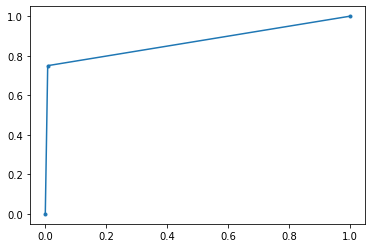

In [28]:
# Your response here
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


precision, recall, _ = roc_curve(y_test, y_pred)
plt.plot(precision, recall, marker='.', label='Logistic_Regression')

plt.show()